In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import MultipleLocator
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data2015_2016.csv')

In [3]:
data2015_2016 = df.loc[~((df['Diastolic_Blood_Pressure'] == 0) | 
                         (df['Systolic_Blood_Pressure'] == 0) | 
                         (df['Body_Mass_Index'] == 0))]

In [4]:
data2015_2016 = data2015_2016.dropna()

In [5]:
data2015_2016.isnull().sum()

SEQN                        0
Age                         0
Body_Mass_Index             0
Gender                      0
Physical_Activity           0
Total_Caffeine              0
Food_Security               0
Count_Meds                  0
Section_I                   0
Section_H                   0
Diabetes                    0
Race_and_Ethnicity          0
Total_Sodium_Intake         0
Diastolic_Blood_Pressure    0
Systolic_Blood_Pressure     0
dtype: int64

In [6]:
data2015_2016['Systolic'] = pd.cut(x = data2015_2016['Systolic_Blood_Pressure'],
                     bins=[0,140,250],
                     labels=['Normal', 'Hypertension'])

In [7]:
data2015_2016['Diastolic'] = pd.cut(x = data2015_2016['Diastolic_Blood_Pressure'],
                     bins=[1,90,200],
                     labels=['Normal', 'Hypertension'])

# Correlation & Heatmap

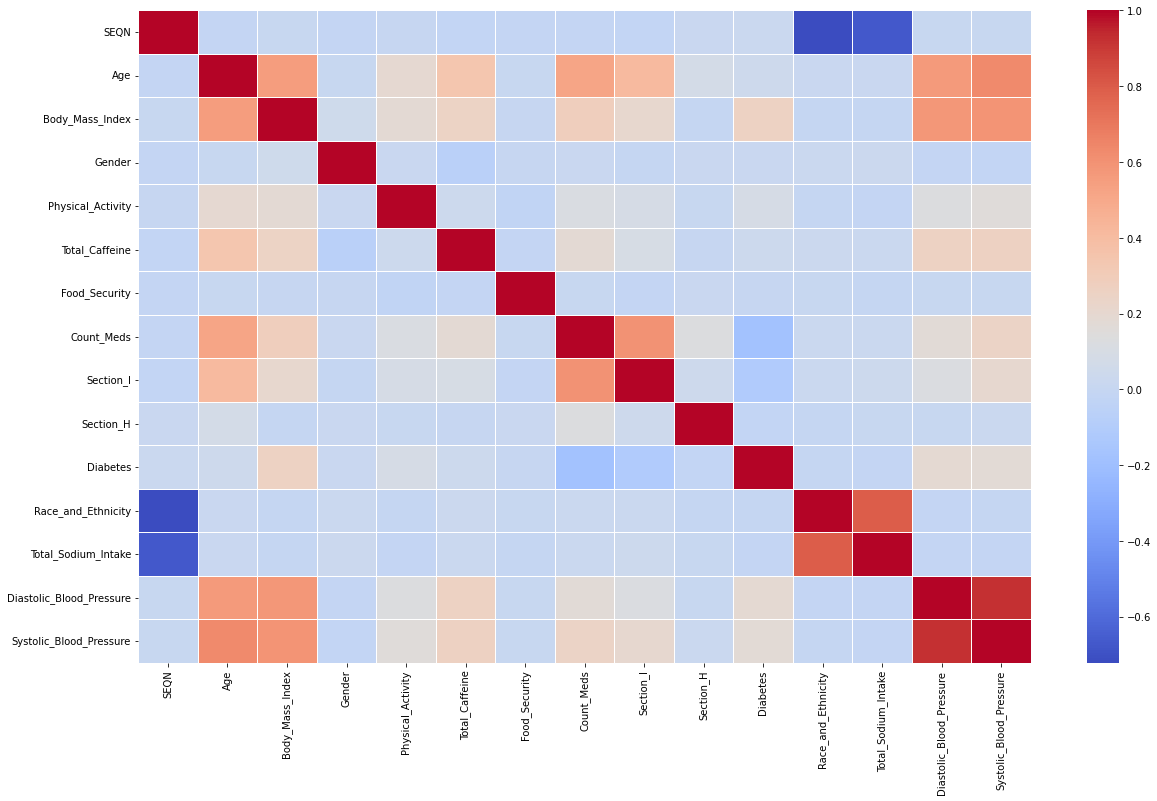

In [8]:
plt.figure(figsize = (20,12))
corrplot = sns.heatmap(df.corr(),
                       annot=False,
                       fmt=".1f",
                       linewidth=.5,
                       cmap = "coolwarm")
plt.show()

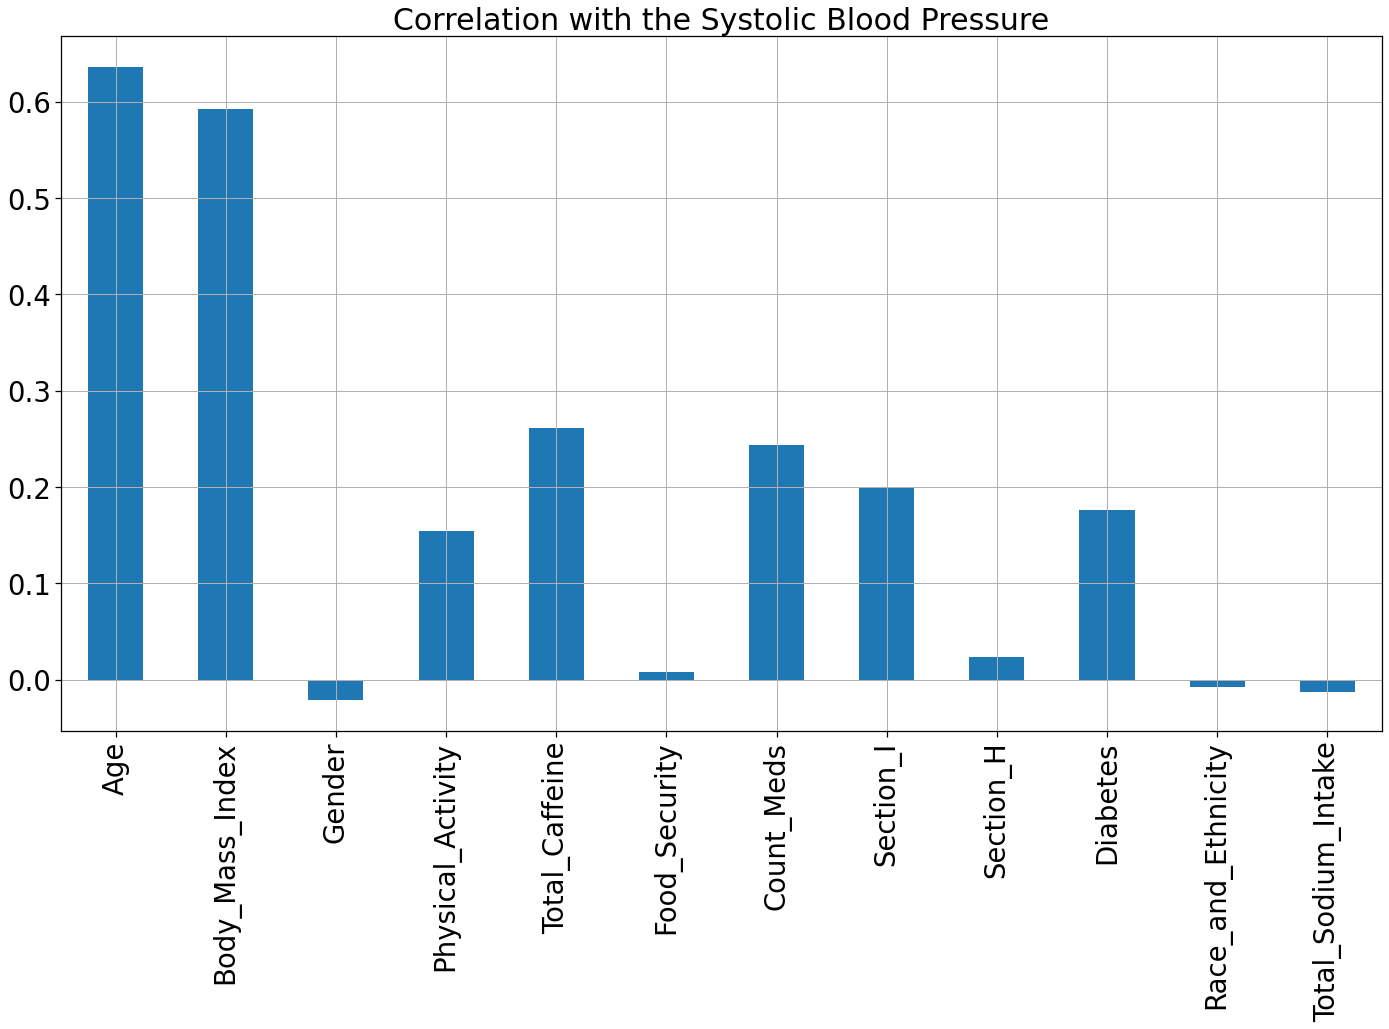

In [9]:
sns.set_context('notebook',font_scale = 2.5)
df.drop(["Diastolic_Blood_Pressure","Systolic_Blood_Pressure","SEQN"], 
          axis=1).corrwith(df.Systolic_Blood_Pressure).plot(kind='bar', 
                                                            grid=True,
                                                            figsize=(20, 15), 
                                                            title="Correlation with the Systolic Blood Pressure")
plt.tight_layout()

# Normal & Hypertension Distribution

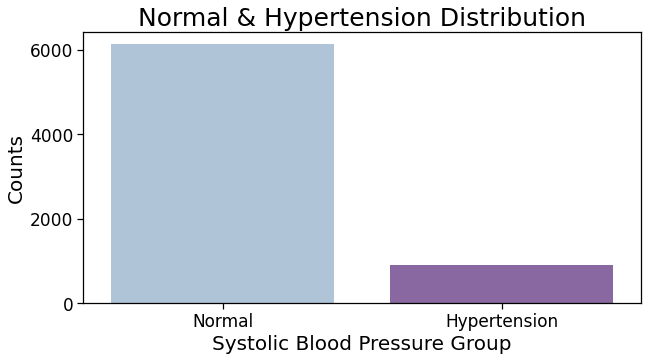

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Systolic',data = data2015_2016,palette="BuPu")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel("Systolic Blood Pressure Group",size = 20)
plt.ylabel("Counts", size = 20)
plt.title('Normal & Hypertension Distribution',size = 25)
plt.show()

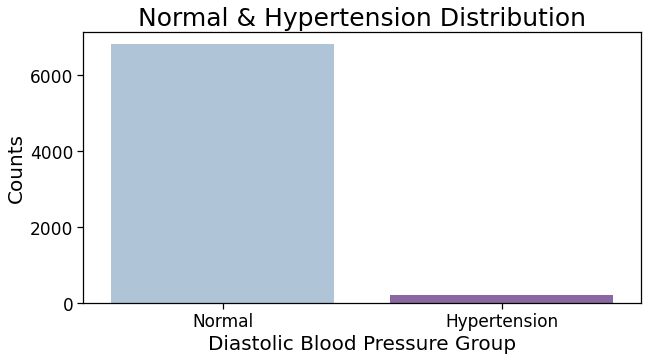

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Diastolic',data = data2015_2016,palette="BuPu")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel("Diastolic Blood Pressure Group",size = 20)
plt.ylabel("Counts", size = 20)
plt.title('Normal & Hypertension Distribution',size = 25)
plt.show()

# Blood Pressure With Age

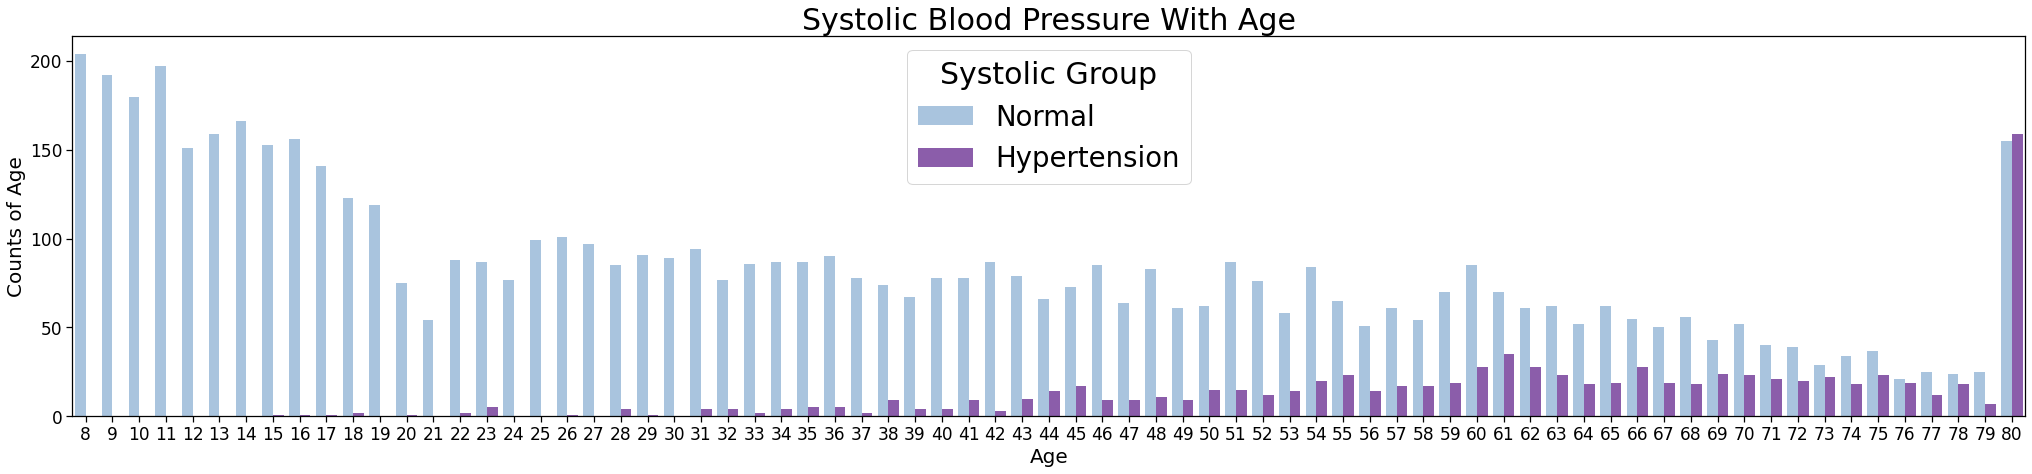

In [12]:
plt.figure(figsize=(35,7))
sns.countplot(x = 'Age', data = data2015_2016, 
              hue ='Systolic', 
              palette='BuPu', 
              saturation=1.5)
plt.legend(loc='upper center', title='Systolic Group')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Age', size = 20)
plt.ylabel('Counts of Age', size = 20)
plt.title('Systolic Blood Pressure With Age',size = 30)
plt.show()

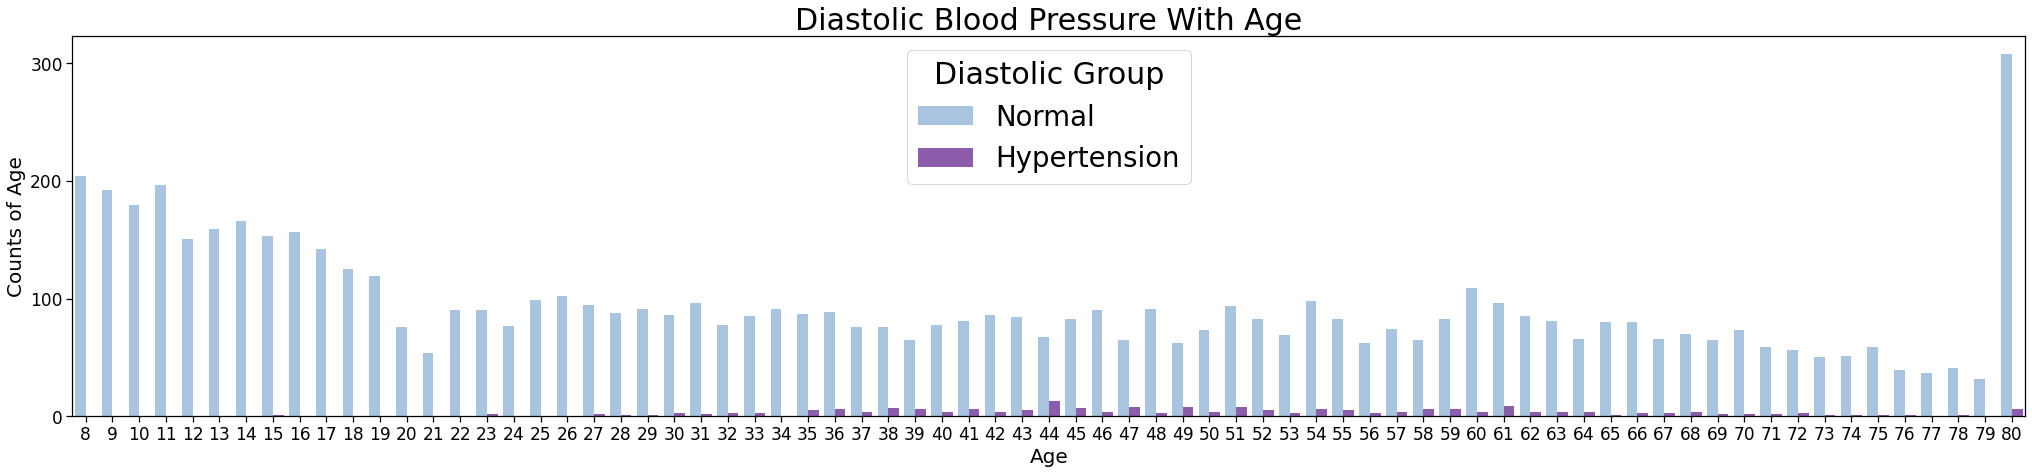

In [13]:
plt.figure(figsize=(35,7))
sns.countplot(x = 'Age', data = data2015_2016, 
              hue ='Diastolic', 
              palette='BuPu', 
              saturation=1.5)
plt.legend(loc='upper center', title='Diastolic Group')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Age', size = 20)
plt.ylabel('Counts of Age', size = 20)
plt.title('Diastolic Blood Pressure With Age',size = 30)
plt.show()

# Blood Pressure with Count of Medicine

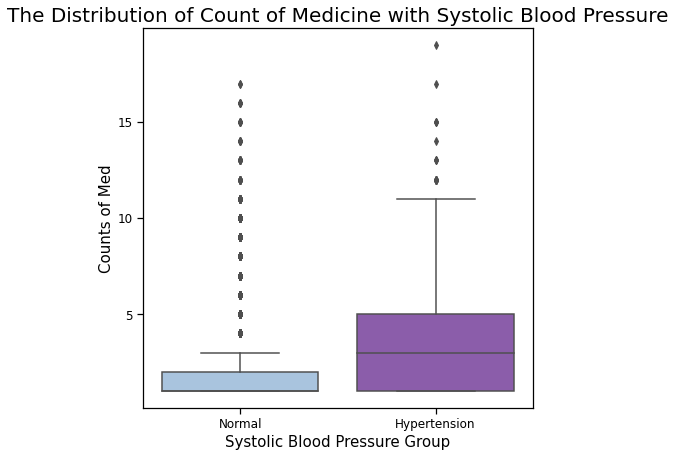

In [14]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Systolic', y = 'Count_Meds', 
            data = data2015_2016,
            palette='BuPu', 
            saturation=1.5,)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Systolic Blood Pressure Group', size = 15)
plt.ylabel('Counts of Med', size = 15)
plt.title('The Distribution of Count of Medicine with Systolic Blood Pressure',size = 20)
plt.show()

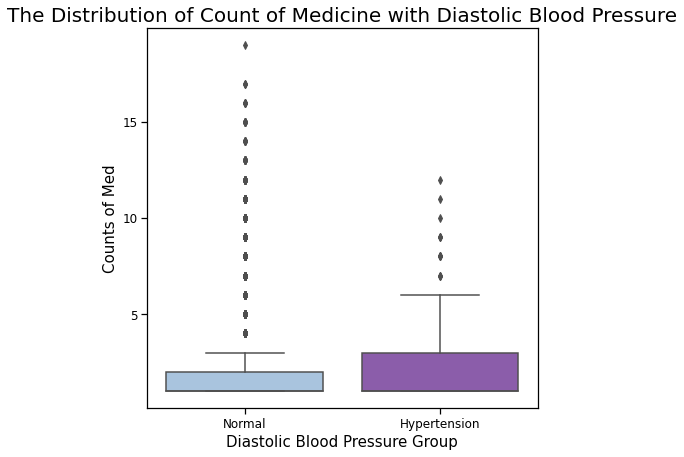

In [15]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Diastolic', y = 'Count_Meds', 
            data = data2015_2016, 
            palette='BuPu', 
            saturation=1.5,)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Diastolic Blood Pressure Group', size = 15)
plt.ylabel('Counts of Med', size = 15)
plt.title('The Distribution of Count of Medicine with Diastolic Blood Pressure',size = 20)
plt.show()

# Blood Pressure across Age and Gender

In [16]:
data2015_2016['gender'] = pd.cut(x=data2015_2016['Gender'],
                     bins=[-1,1,3],
                     labels=['Male', 'Female'])

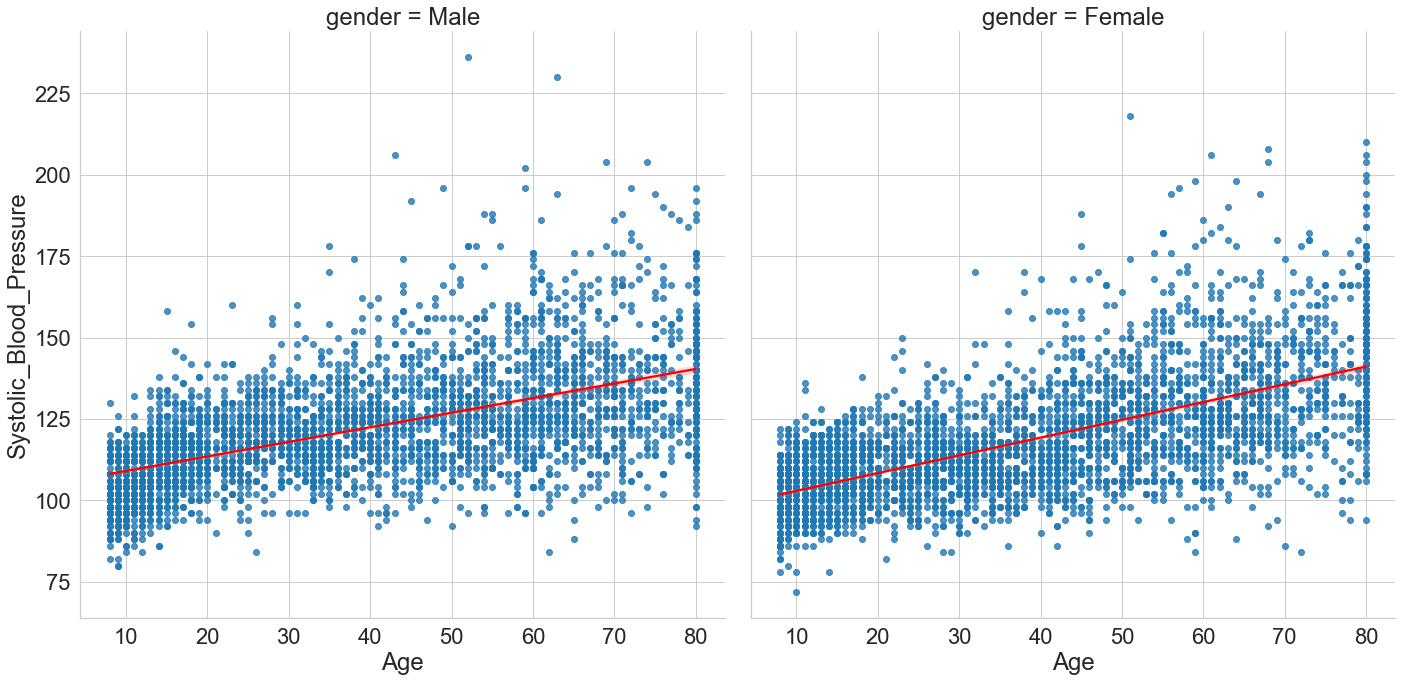

In [17]:
with sns.axes_style("whitegrid"):
    sns.set_context('notebook', font_scale = 2)
    sns.lmplot(x='Age', y='Systolic_Blood_Pressure', 
               data = data2015_2016, 
               col="gender", 
               height=10,
               line_kws={'color': 'red'})
    plt.show()

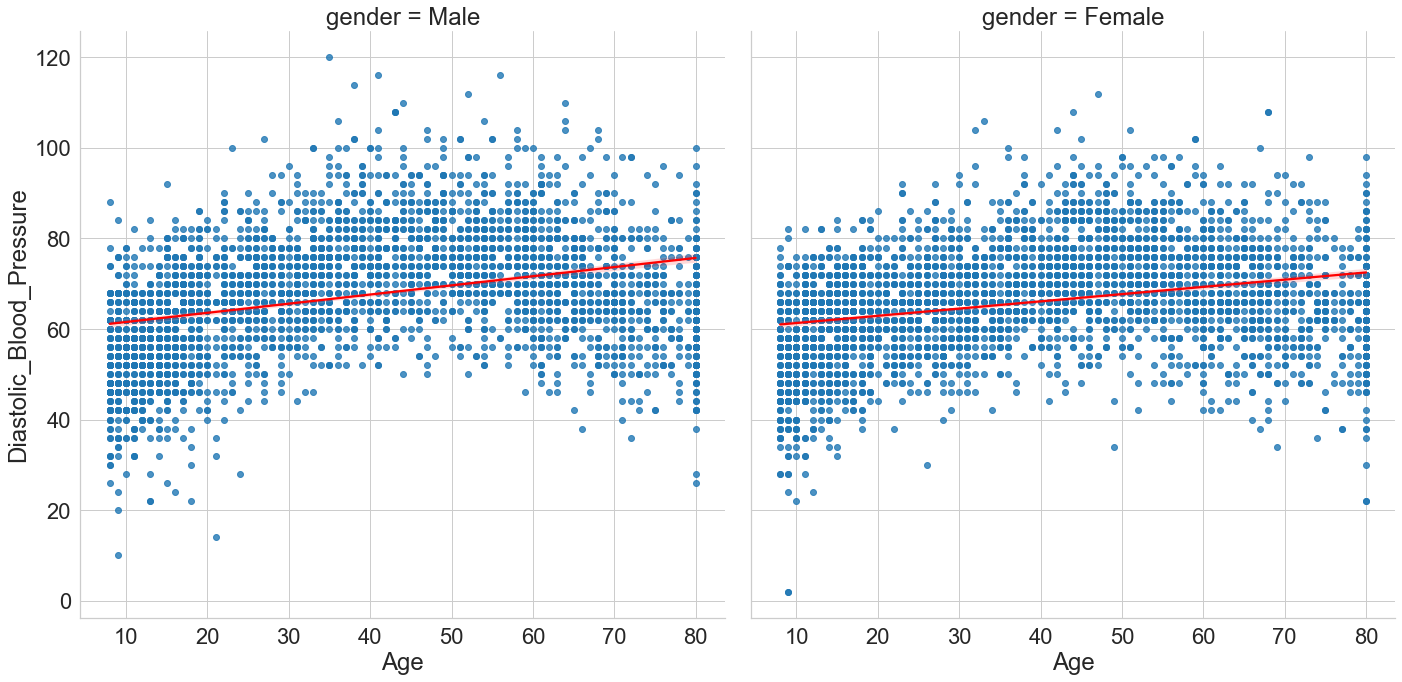

In [18]:
with sns.axes_style("whitegrid"):
    sns.set_context('notebook', font_scale = 2)
    sns.lmplot(x='Age', y='Diastolic_Blood_Pressure', 
               data = data2015_2016, 
               col="gender", 
               height=10,
               line_kws={'color': 'red'})
    plt.show()